In [120]:
!pip install feature-engine
!pip install ace_tools

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import seaborn as sns
import time
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

## VERİSETİNİ YÜKLEME İŞLEMİ

In [123]:
data = pd.read_csv("mobil_modified.csv") 
data_cleaned = data.copy()
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,NaN
1,1021.0,1.0,0.5,1.0,0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,18210.0,1.0,1.2,0.0,13,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,1520.0,0.0,0.5,0.0,1,0.0,25.0,0.5,171.0,3.0,...,52.0,1009.0,651.0,6.0,0.0,5.0,1.0,0.0,1.0,0.0
2040,1500.0,0.0,2.2,0.0,2,0.0,55.0,0.6,80.0,7.0,...,503.0,1336.0,3866.0,13.0,7.0,20.0,0.0,1.0,0.0,NaN
2041,1343.0,0.0,2.9,0.0,2,1.0,34.0,0.8,171.0,3.0,...,235.0,1671.0,3911.0,15.0,8.0,8.0,1.0,1.0,1.0,3.0
2042,NaN,1.0,1.4,1.0,0,0.0,30.0,1.0,87.0,2.0,...,829.0,1893.0,439.0,6.0,2.0,20.0,1.0,0.0,0.0,3.0


## DUPLİCATE VERİ TEMİZLEME İŞLEMİ

In [125]:
# Duplicate veri temizliği
data_cleaned = data_cleaned[data_cleaned.duplicated(keep='first') == False]
data_cleaned

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,NaN
1,1021.0,1.0,0.5,1.0,0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,18210.0,1.0,1.2,0.0,13,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,1488.0,0.0,2.6,0.0,9,0.0,37.0,0.7,189.0,4.0,...,47.0,559.0,2524.0,5.0,0.0,6.0,0.0,0.0,0.0,1.0
2021,1882.0,0.0,2.0,0.0,11,1.0,44.0,0.8,113.0,8.0,...,NaN,743.0,3579.0,19.0,8.0,20.0,1.0,1.0,0.0,3.0
2025,794.0,1.0,0.5,1.0,0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,NaN
2040,1500.0,0.0,2.2,0.0,2,0.0,55.0,0.6,80.0,7.0,...,503.0,1336.0,3866.0,13.0,7.0,20.0,0.0,1.0,0.0,NaN


## NULL DEĞER KONTROLÜ

In [127]:

data_cleaned.isnull().sum()

battery_power     5
blue             10
clock_speed       7
dual_sim          5
fc                0
four_g            3
int_memory        9
m_dep             5
mobile_wt         6
n_cores           2
pc                4
px_height         5
px_width          1
ram               8
sc_h              3
sc_w              1
talk_time         1
three_g           6
touch_screen      6
wifi              8
price_range      14
dtype: int64

## KATEGORİK VE NUMERİKLERİN AYRILMASI, NULL DEĞERLERİN DOLDURULMASI

In [129]:
# Kategorik ve Numeric Sütunlar
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
numerical_features = [col for col in data_cleaned.columns if col not in categorical_features]

# Numerik Sütunlardaki Null değerler ortalama ile dolduruldu
data_cleaned[numerical_features] = data_cleaned[numerical_features].apply(lambda x: x.fillna(x.mean()))

# Kategorik Sütunlardaki Null değerler mod ile dolduruldu
data_cleaned[categorical_features] = data_cleaned[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Tekrar Null değer kontrolü
remaining_nulls = data_cleaned.isnull().sum()
remaining_nulls


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## KATEGORİK VERİLER İÇİN UNİQUE DEĞERLERİN GÖSTERİLMESİ

In [131]:

unique_values = {col: data_cleaned[col].unique() for col in categorical_features}
unique_values


{'blue': array([0., 1., 3.]),
 'dual_sim': array([0., 1.]),
 'four_g': array([0., 1.]),
 'three_g': array([0., 1.]),
 'touch_screen': array([0., 1.]),
 'wifi': array([1., 0.]),
 'price_range': array([3., 2., 1., 0.])}

## BLUETOOTH İÇİN GEÇERSİZ OLAN DEĞER MOD İLE DOLDURULDU

In [133]:
#'blue' sütununda 3 değeri olamaz bunu düzeltiyoruz.
# 'blue' sütununun modunu hesapla (en sık görülen değer)
blue_mode = data_cleaned['blue'].mode()[0]

# 0 ve 1 dışındaki değerleri mod ile doldur
data_cleaned['blue'] = data_cleaned['blue'].apply(lambda x: x if x in [0, 1] else blue_mode)

# Sonucu kontrol et
unique_values = {col: data_cleaned[col].unique() for col in categorical_features}
unique_values

{'blue': array([0., 1.]),
 'dual_sim': array([0., 1.]),
 'four_g': array([0., 1.]),
 'three_g': array([0., 1.]),
 'touch_screen': array([0., 1.]),
 'wifi': array([1., 0.]),
 'price_range': array([3., 2., 1., 0.])}

## Kategorik verileri görselleştirme

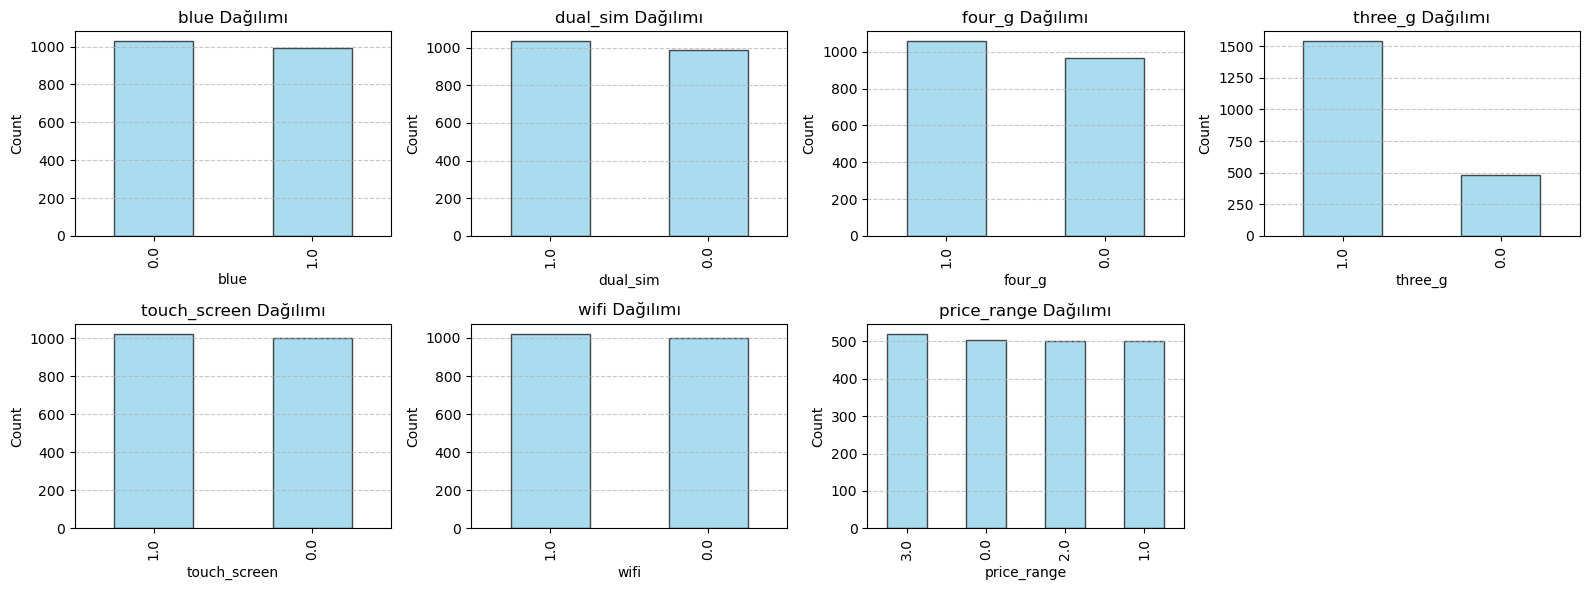

In [135]:
# Grafik ayarları
n_cols = 4  # Her sırada kaç grafik olsun
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  # Kaç satır gerektiğini hesapla

# Alt grafik düzeni oluştur
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))  # Her grafiğe daha küçük boyut

# Axisleri düzleştir (tek boyutlu hale getir)
axes = axes.flatten()

# Her kategorik özelliği çiz
for i, feature in enumerate(categorical_features):
    data_cleaned[feature].value_counts().plot(
        kind='bar', color='skyblue', edgecolor='k', alpha=0.7, ax=axes[i]
    )
    axes[i].set_title(f'{feature} Dağılımı')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

## Numeric verileri görselleştirme

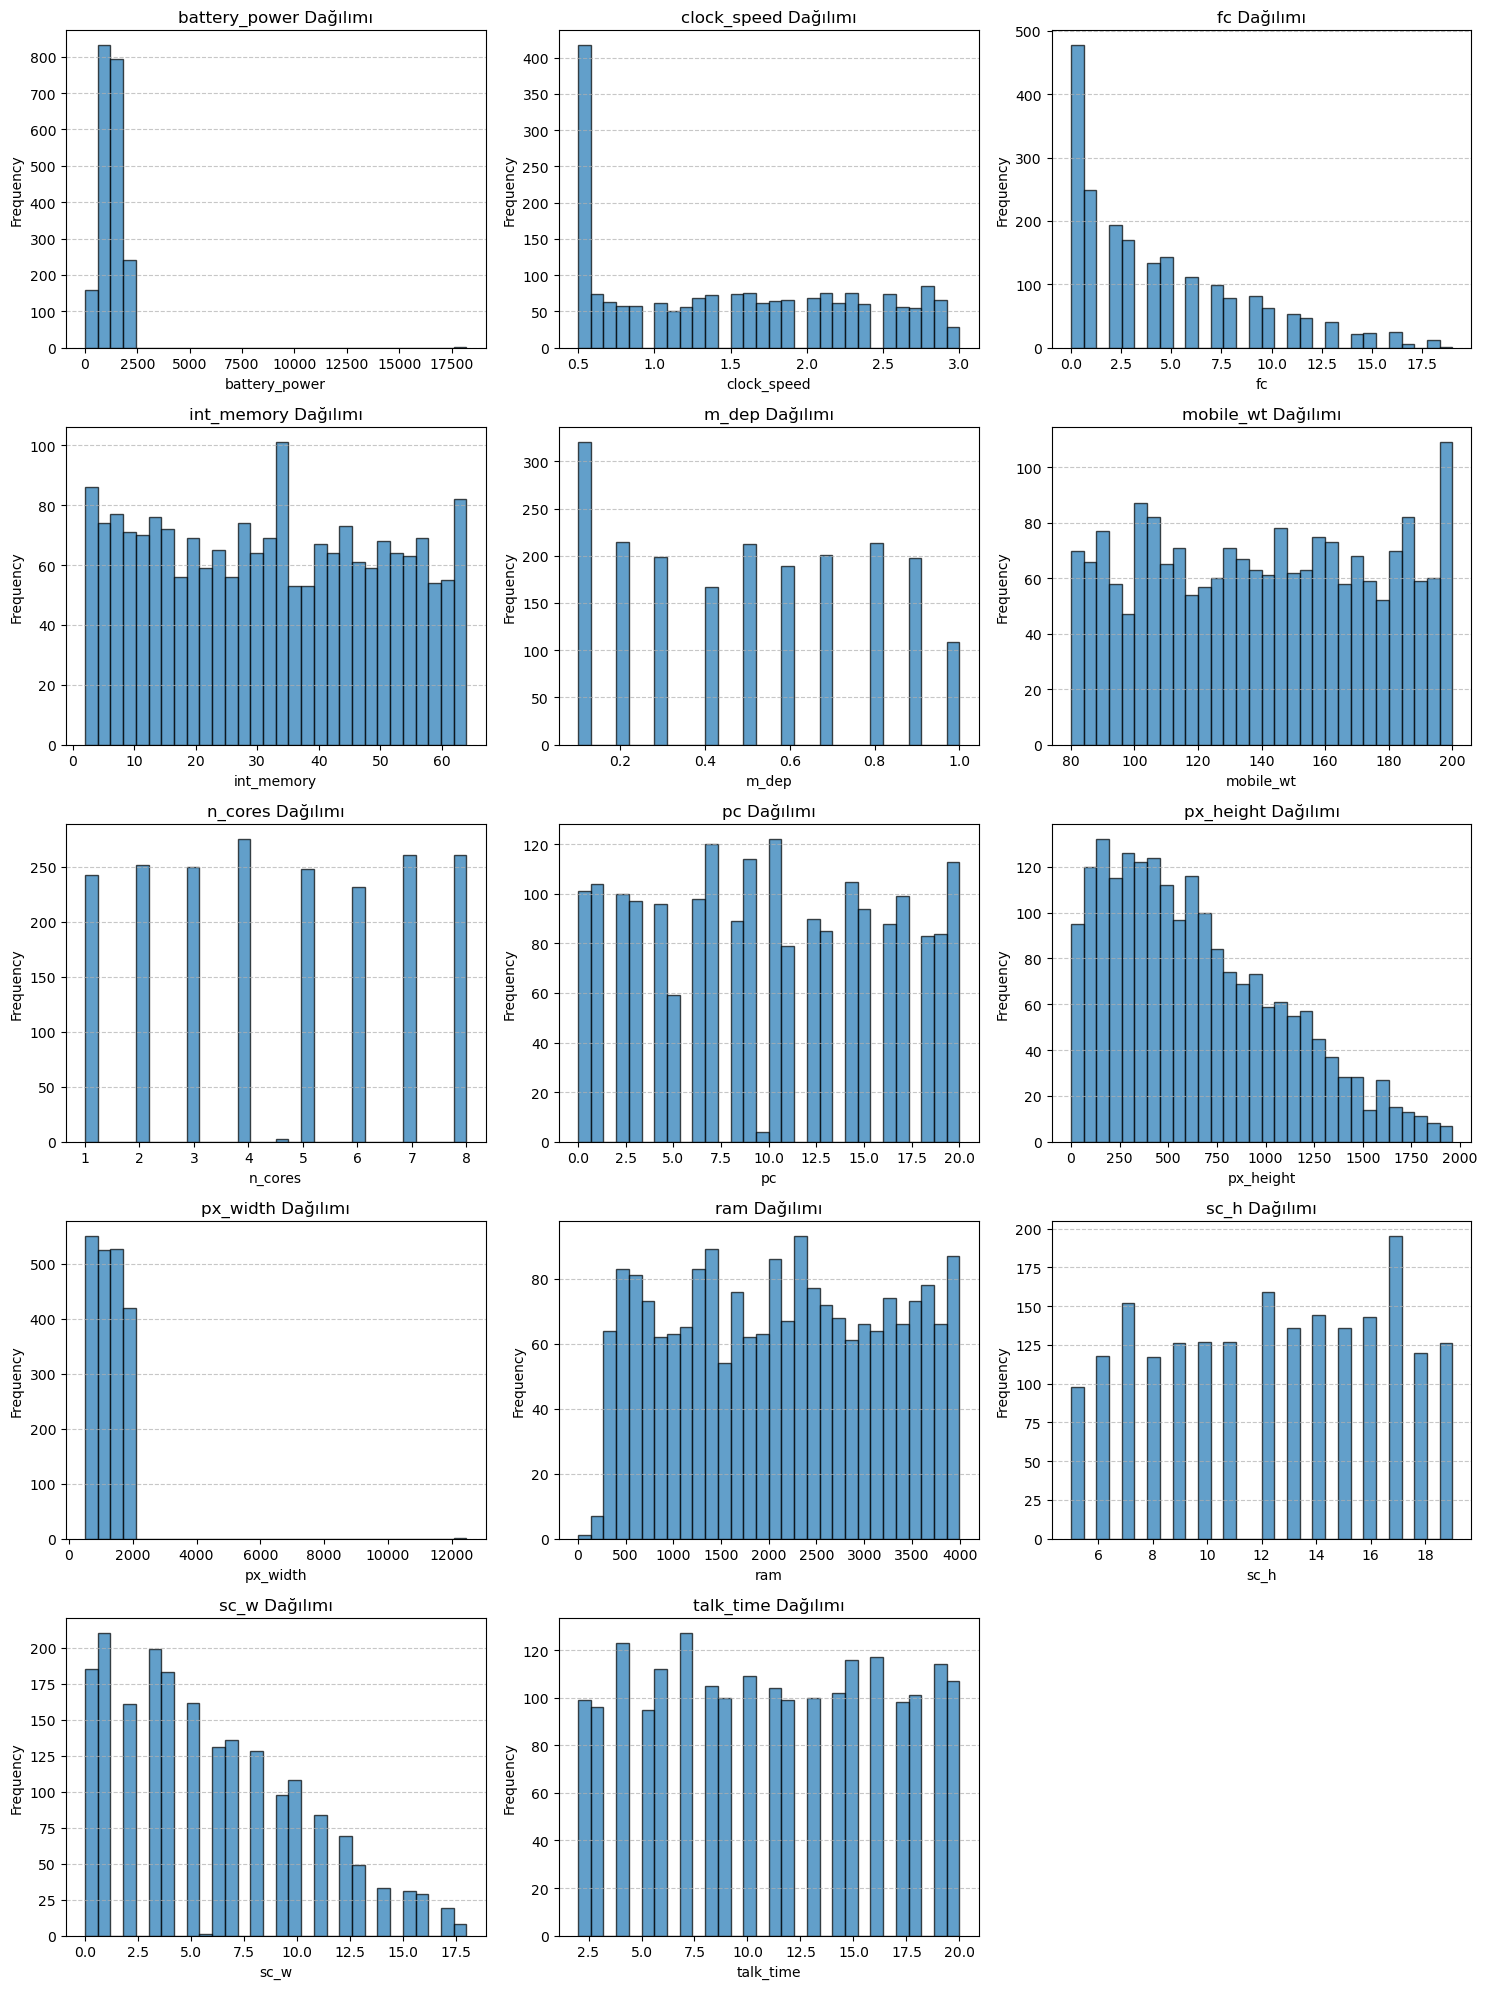

In [137]:
n_cols = 3  # Her satırda kaç grafik olacak
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Gerekli satır sayısını hesapla

# Grafik Boyutlandırılması
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Axisleri düzleştir (tek boyutlu hale getir)
axes = axes.flatten()

# Her numeric özelliği çiz
for i, feature in enumerate(numerical_features):
    axes[i].hist(data_cleaned[feature], bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'{feature} Dağılımı')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Kullanılmayan boş grafik alanlarını kaldır
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Layout sıkışıklığını gider
plt.tight_layout()

# Tüm grafikleri tek ekranda göster
plt.show()


## Uç Değer Analizi

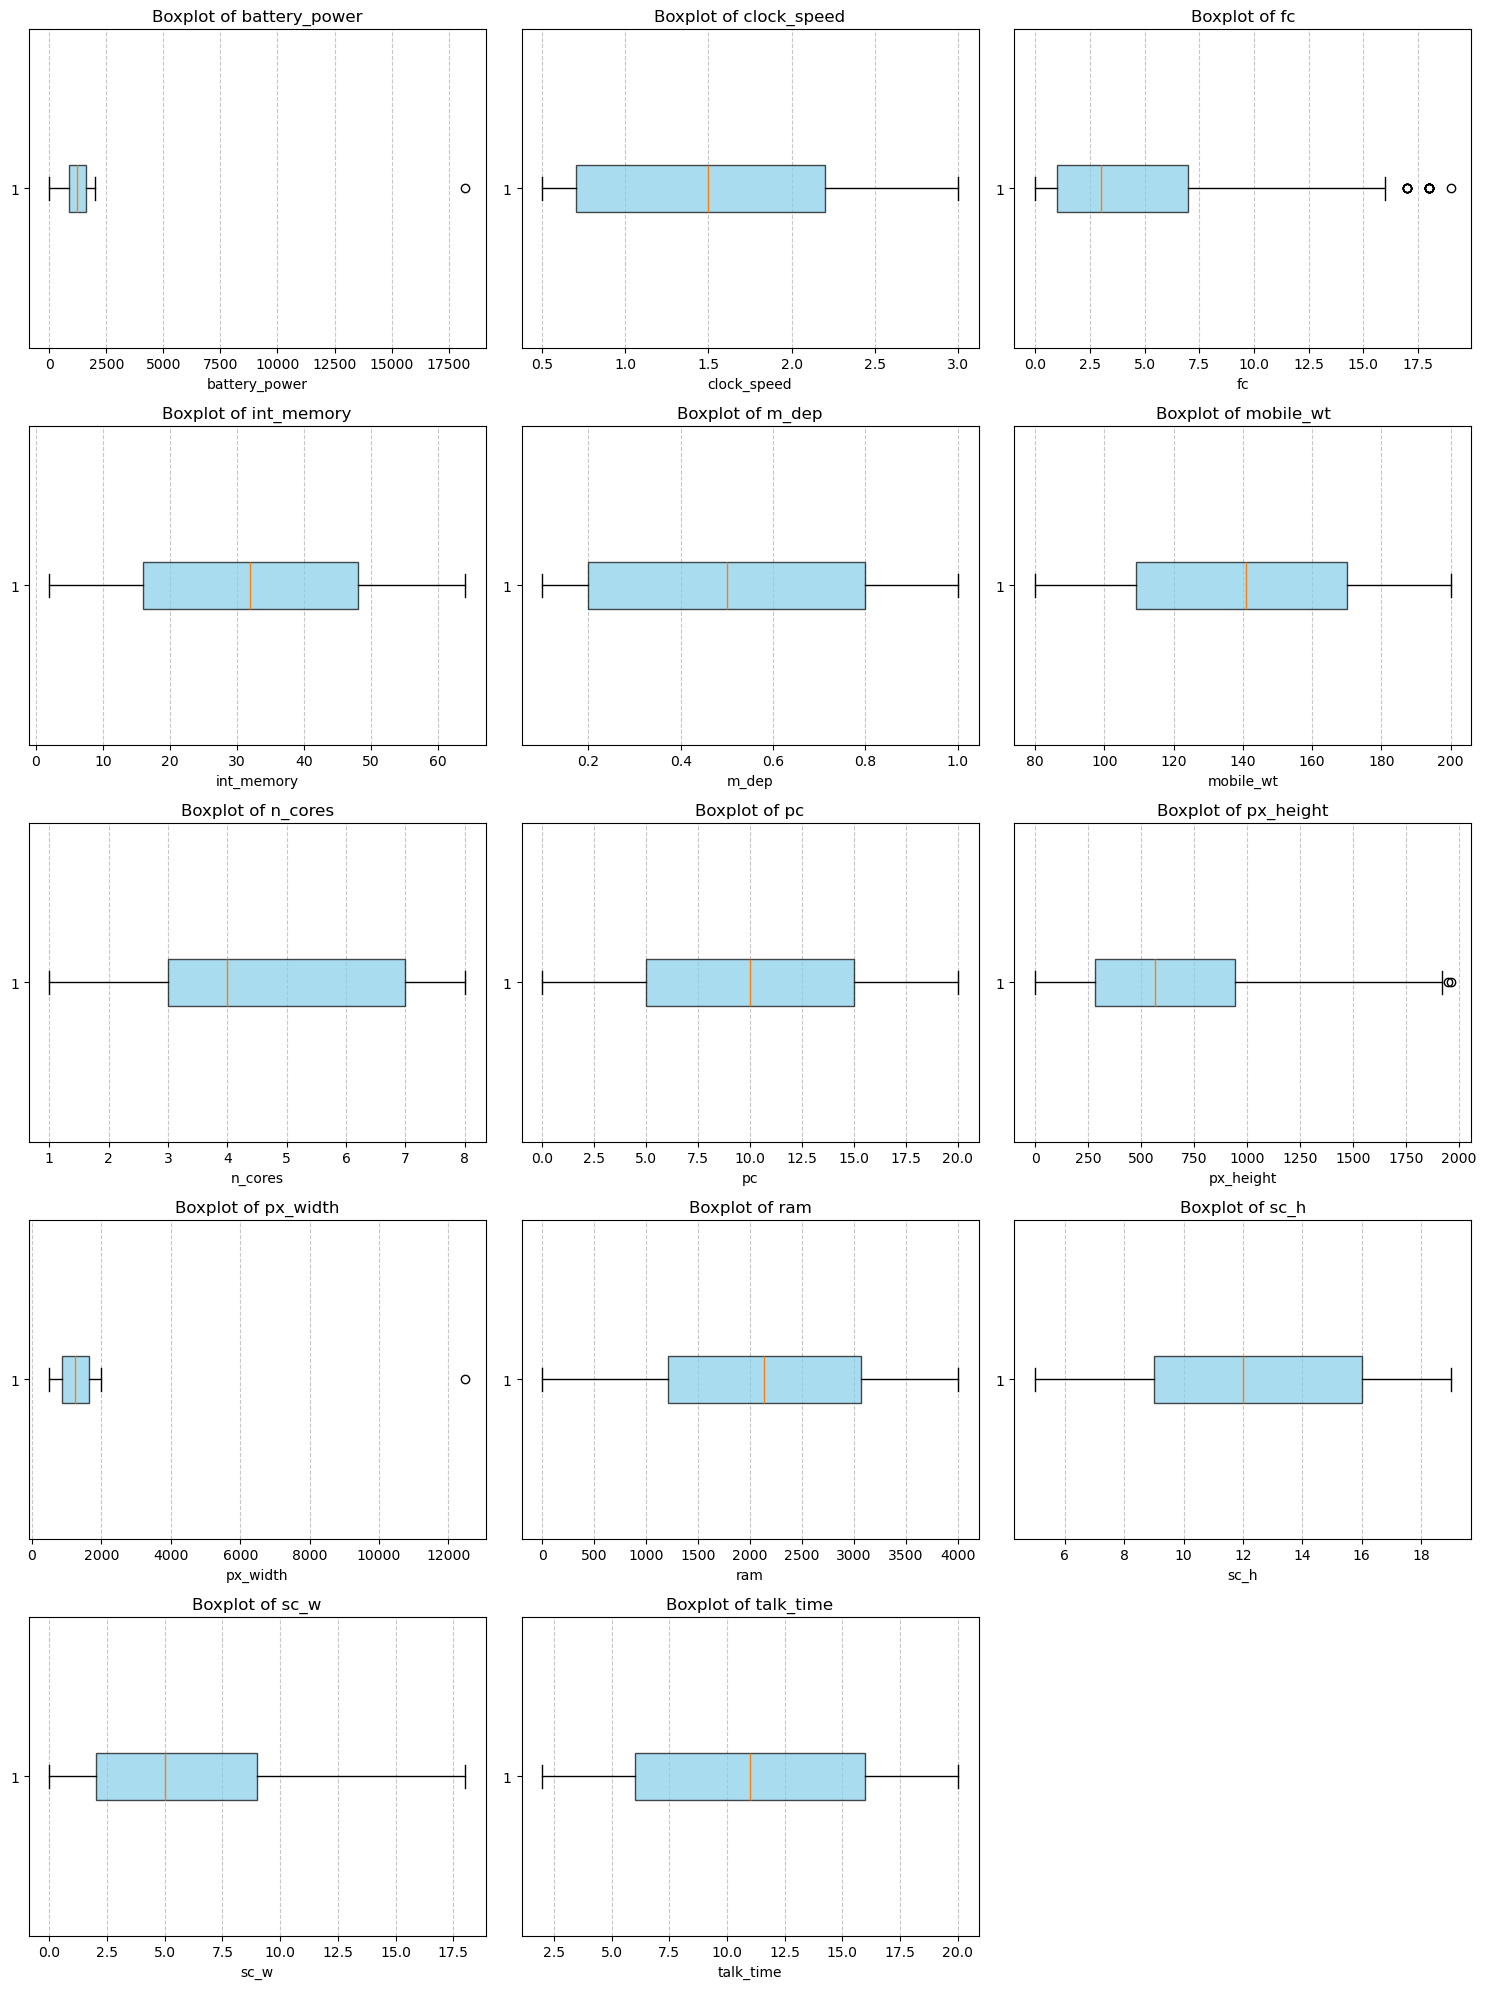

In [139]:
#Uç Değer Analizi

n_cols = 3  # Her satırda kaç grafik olacak
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  #Satır Sayısı

# Grafiklerin boyutlandırılması
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Axisleri düzleştir (tek boyutlu hale getir)
axes = axes.flatten()

# Her numeric özelliği çiz
for i, feature in enumerate(numerical_features):
    axes[i].boxplot(
        data_cleaned[feature],
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor='skyblue', alpha=0.7)
    )
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

# Kullanılmayan boş grafik alanlarını kaldır
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Layout sıkışıklığını gider
plt.tight_layout()

# Tüm grafikleri tek ekranda göster
plt.show()

In [140]:
# Uç değer kontrolü
columns_to_check = [col for col in numerical_features if col != 'fc']
# Z-Score hesaplama
z_scores = np.abs(data_cleaned[columns_to_check].apply(zscore))

# Bir eşik belirlenir (genelde 3 kullanılır)
threshold = 3

# Eşik değerini aşan satırları tespit etme
outliers = (z_scores > threshold)
print("\nUç Değerler (Z-Score > 3) Bulunan Satırlar:")
print(data_cleaned[outliers.any(axis=1)])
# Uç değer içermeyen satırları tutma
data_cleaned = data_cleaned[~outliers.any(axis=1)]

# Sonuçları yazdır
print("\nUç Değerleri Kaldırılmış Veri:")
data_cleaned



Uç Değerler (Z-Score > 3) Bulunan Satırlar:
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
4      18210.000000   1.0          1.2       0.0  13     1.0        44.0   
1068    1247.496285   1.0          0.5       0.0   4     0.0        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
4       0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   
1068    0.5      197.0      1.0  ...      179.0   12470.0   560.0   9.0   1.0   

      talk_time  three_g  touch_screen  wifi  price_range  
4          15.0      1.0           1.0   0.0          1.0  
1068       10.0      1.0           1.0   0.0          0.0  

[2 rows x 21 columns]

Uç Değerleri Kaldırılmış Veri:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.000000,0.0,2.2,0.0,1,0.0,7.0,0.6,188.0,2.0,...,20.000000,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,3.0
1,1021.000000,1.0,0.5,1.0,0,1.0,53.0,0.7,136.0,3.0,...,905.000000,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.000000,1.0,0.5,1.0,2,1.0,41.0,0.9,145.0,5.0,...,1263.000000,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.000000,1.0,2.5,0.0,0,0.0,10.0,0.8,131.0,6.0,...,1216.000000,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
5,1859.000000,0.0,0.5,1.0,3,0.0,22.0,0.7,164.0,1.0,...,1004.000000,1654.0,1067.0,17.0,1.0,10.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,1488.000000,0.0,2.6,0.0,9,0.0,37.0,0.7,189.0,4.0,...,47.000000,559.0,2524.0,5.0,0.0,6.0,0.0,0.0,0.0,1.0
2021,1882.000000,0.0,2.0,0.0,11,1.0,44.0,0.8,113.0,8.0,...,643.809312,743.0,3579.0,19.0,8.0,20.0,1.0,1.0,0.0,3.0
2025,794.000000,1.0,0.5,1.0,0,1.0,2.0,0.8,106.0,6.0,...,1222.000000,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,3.0
2040,1500.000000,0.0,2.2,0.0,2,0.0,55.0,0.6,80.0,7.0,...,503.000000,1336.0,3866.0,13.0,7.0,20.0,0.0,1.0,0.0,3.0


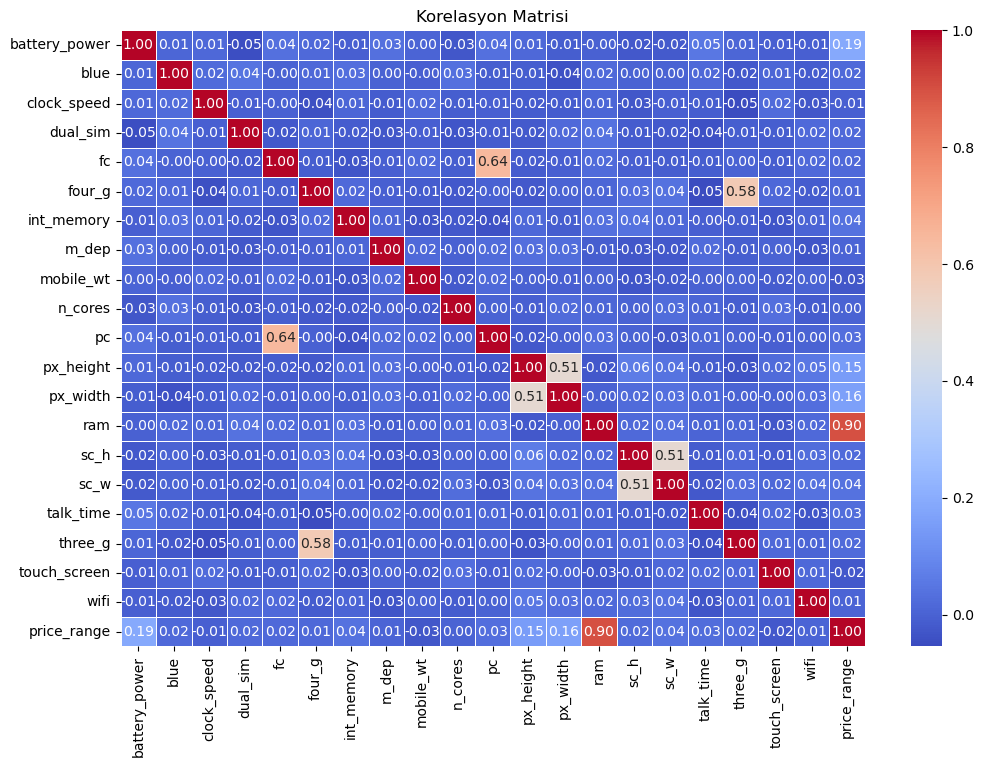

In [141]:
# Korelasyon Matrisi
correlation_matrix = data_cleaned.corr()

#ısı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [142]:
X = data_cleaned.drop(columns=['price_range'])  # Bağımsız değişkenler
y = data_cleaned['price_range']                # Hedef değişken

### RBF Kernel İle KPCA

In [144]:
# KERNEL PCA (kernel rbf seçildi)
kpca = KernelPCA(kernel='rbf', n_components=2, gamma=0.1, random_state=42)
X_kpca = kpca.fit_transform(X)


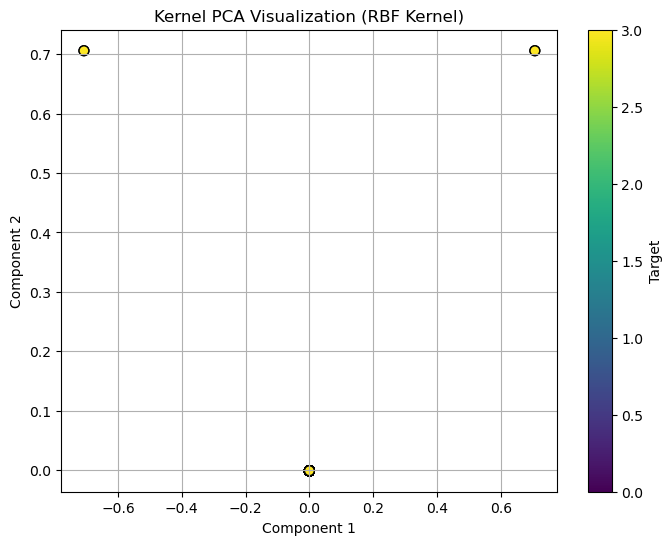

In [145]:
# Kernel PCA GÖRSELLEŞTİRİLMESİ RBF İLE
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Kernel PCA Visualization (RBF Kernel)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")                                                                                                        
plt.colorbar(label="Target")
plt.grid(True)
plt.show()

## KNN 

In [147]:
#RBF ile yapılan KPCA sonrası KNN model eğitimi
 
X_train_kpca, X_test_kpca, y_train, y_test = train_test_split(X_kpca, y, test_size=0.3, random_state=43, stratify=y)

# Initialize and train KNN classifier on PCA data
knn_kpca = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_kpca.fit(X_train_kpca, y_train)

# Predict on the test set
y_pred_kpca = knn_kpca.predict(X_test_kpca)

# Evaluate the model
accuracy_kpca = accuracy_score(y_test, y_pred_kpca)
classification_rep_kpca = classification_report(y_test, y_pred_kpca)

# Display the results
print("KNN Doğruluk Değeri")
accuracy_kpca

KNN Doğruluk Değeri


0.24546952224052718

In [148]:
classification_rep_kpca

'              precision    recall  f1-score   support\n\n         0.0       0.23      0.30      0.26       151\n         1.0       0.25      0.27      0.26       150\n         2.0       0.24      0.22      0.23       150\n         3.0       0.27      0.19      0.22       156\n\n    accuracy                           0.25       607\n   macro avg       0.25      0.25      0.24       607\nweighted avg       0.25      0.25      0.24       607\n'

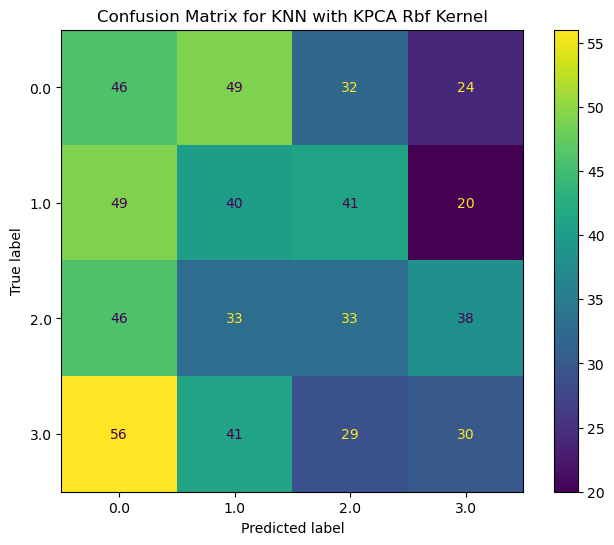

In [149]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_kpca)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix for KNN with KPCA Rbf Kernel")
plt.show()

## Poly Kernel İle KPCA

In [151]:
# KERNEL PCA FEATURE EXTRACTION POLY KERNEL
kpca = KernelPCA(kernel='poly', n_components=3, gamma=0.1, random_state=42)
X_kpca = kpca.fit_transform(X)

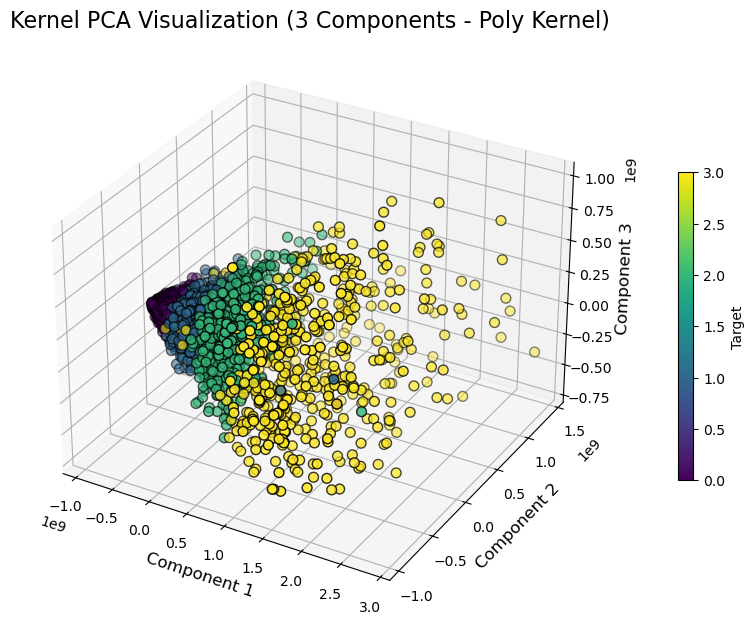

In [152]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the 3 components
scatter = ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], c=y, cmap='viridis', s=50, edgecolor='k')

# Set axis labels
ax.set_title("Kernel PCA Visualization (3 Components - Poly Kernel)", fontsize=16)
ax.set_xlabel("Component 1", fontsize=12)
ax.set_ylabel("Component 2", fontsize=12)
ax.set_zlabel("Component 3", fontsize=12)

# Add colorbar
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.5)
colorbar.set_label("Target")

plt.show()

## KNN ALGORİTMASI

In [154]:
#KNN KPCA POLY İLE
X_train_kpca, X_test_kpca, y_train, y_test = train_test_split(X_kpca, y, test_size=0.3, random_state=43, stratify=y)

# SÜRELERİ TUTMAK İÇİN 
execution_times = {}

start_time = time.time()
knn_kpca = KNeighborsClassifier(n_neighbors=5)
knn_kpca.fit(X_train_kpca, y_train)
y_pred_kpca = knn_kpca.predict(X_test_kpca)
execution_times['KNN'] = time.time() - start_time

# Predict on the test set
y_pred_kpca = knn_kpca.predict(X_test_kpca)

# Evaluate the model

# Evaluate the model
accuracy_kpca = accuracy_score(y_test, y_pred_kpca)
classification_rep_kpca = classification_report(y_test, y_pred_kpca, output_dict=True)

# Sonuçları düzenli bir tablo haline getirme
classification_df = pd.DataFrame(classification_rep_kpca).transpose()

# Doğruluk değerini gösterme
print("\nKNN Doğruluk Değeri: {:.2f}%".format(accuracy_kpca * 100))

# Classification Report'u düzgün tablo olarak gösterme
print("\nKNN Classification Report:")
display(classification_df)


KNN Doğruluk Değeri: 92.26%

KNN Classification Report:


,precision,recall,f1-score,support
0.0,0.960784,0.973510,0.967105,151.00000
1.0,0.894040,0.900000,0.897010,150.00000
2.0,0.899329,0.893333,0.896321,150.00000
3.0,0.935065,0.923077,0.929032,156.00000
accuracy,0.922570,0.922570,0.922570,0.92257
macro avg,0.922304,0.922480,0.922367,607.00000
weighted avg,0.922494,0.922570,0.922507,607.00000


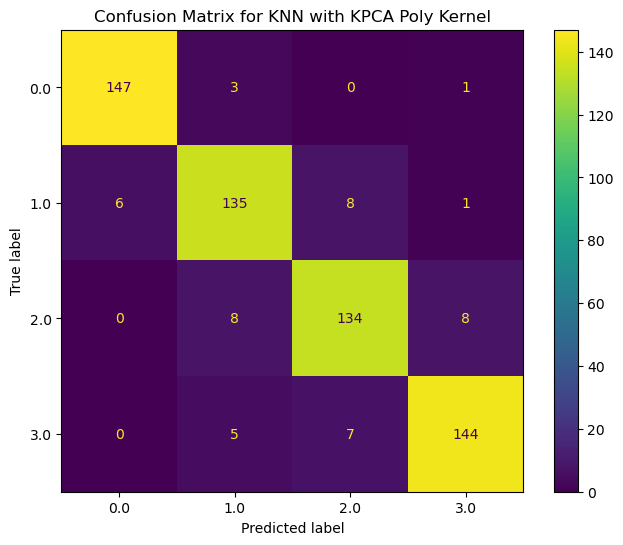

In [155]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_kpca)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix for KNN with KPCA Poly Kernel")
plt.show()

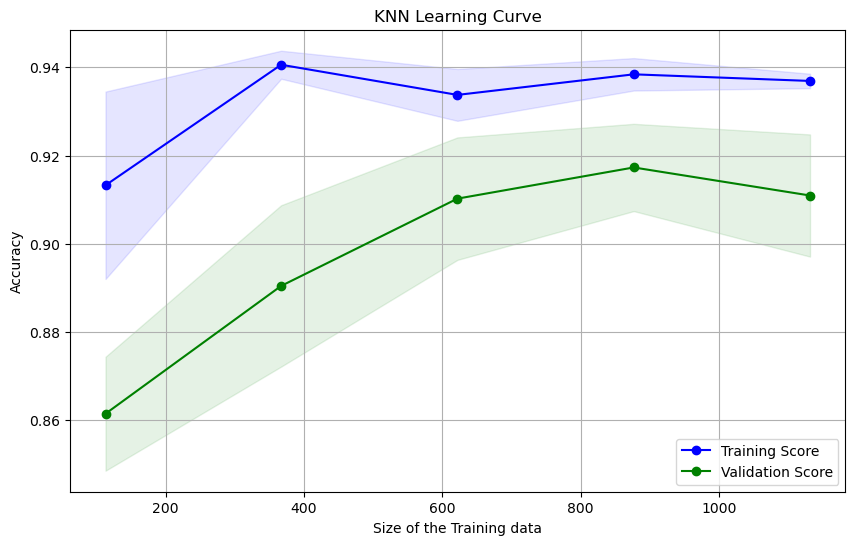

KNN Accuracy Rate: 0.9225700164744646


In [156]:
train_sizes, train_scores, test_scores = learning_curve(
    knn_kpca, X_train_kpca, y_train,
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ortalama ve standart sapmaları hesaplayalım
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')

# Standart sapmalar için gölgelendirme
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('KNN Learning Curve')
plt.xlabel('Size of the Training data')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# KNN doğruluk değeri
print("KNN Accuracy Rate:", accuracy_kpca)

## Random Forest Algoritması

In [158]:
start_time = time.time()
rf_kpca = RandomForestClassifier(n_estimators=10, random_state=46 , max_depth = 5)
rf_kpca.fit(X_train_kpca, y_train)
y_pred_kpca_rf = rf_kpca.predict(X_test_kpca)
execution_times['Random Forest'] = time.time() - start_time

# Evaluate the model
accuracy_kpca_rf = accuracy_score(y_test, y_pred_kpca_rf)
classification_rep_kpca_rf = classification_report(y_test, y_pred_kpca_rf)

# Display the results
print(f"Random Forest Classifier Accuracy: {accuracy_kpca_rf}")
print("\nClassification Report for Random Forest:\n")
print(classification_rep_kpca_rf)


Random Forest Classifier Accuracy: 0.8846787479406919

Classification Report for Random Forest:

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       151
         1.0       0.87      0.86      0.86       150
         2.0       0.83      0.83      0.83       150
         3.0       0.90      0.88      0.89       156

    accuracy                           0.88       607
   macro avg       0.88      0.88      0.88       607
weighted avg       0.88      0.88      0.88       607



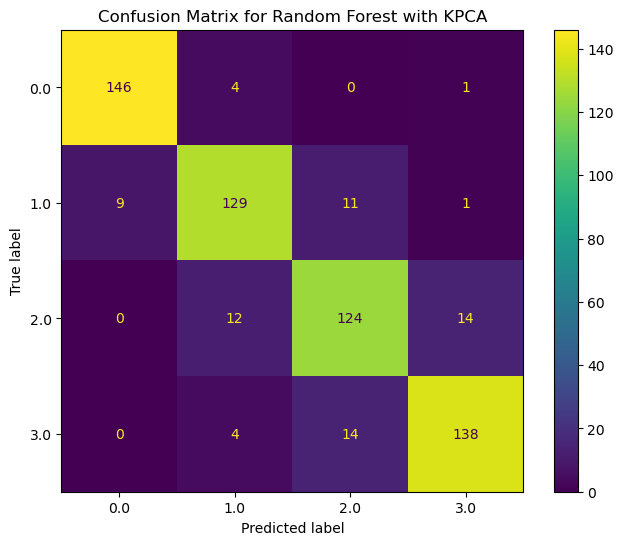

In [159]:
# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_kpca_rf)

# Display confusion matrix as a plot
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
disp_rf.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix for Random Forest with KPCA")
plt.show()

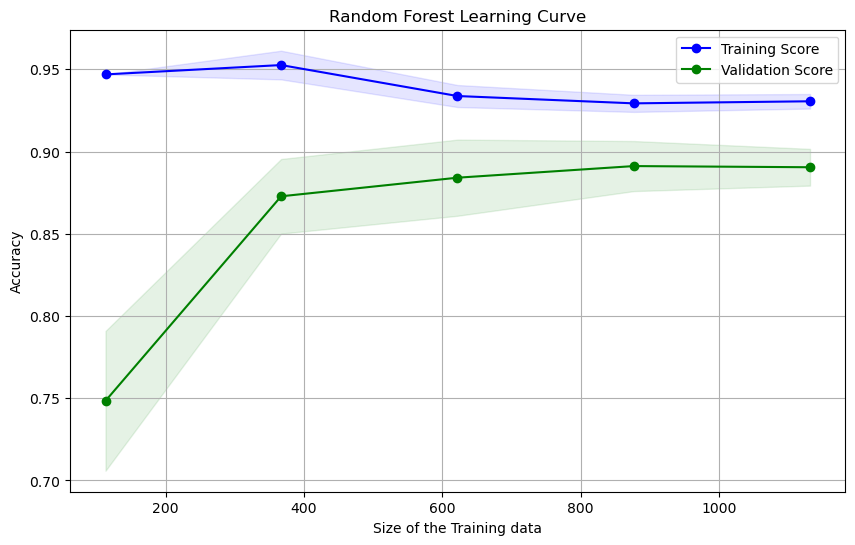

In [160]:
# Learning curve için verileri elde edelim
train_sizes, train_scores, test_scores = learning_curve(
    rf_kpca, X_train_kpca, y_train,
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ortalama ve standart sapmaları hesaplayalım
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')

# Standart sapmalar için gölgelendirme
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Random Forest Learning Curve')
plt.xlabel('Size of the Training data')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## XGBoost Algoritması

In [162]:
# Split the data (same as before)
# Initialize and train XGBoost classifier on KPCA data
start_time = time.time()
xgb_kpca = XGBClassifier(
    n_estimators=10,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    #multi burada bizim sınıflandırmamız 2 den fazla olduğu için multi
    objective='multi:softmax',
    num_class=len(np.unique(y))
)
xgb_kpca.fit(X_train_kpca, y_train)
y_pred_kpca_xgb = xgb_kpca.predict(X_test_kpca)
execution_times['XGBoost'] = time.time() - start_time

# Evaluate the model
accuracy_kpca_xgb = accuracy_score(y_test, y_pred_kpca_xgb)
classification_rep_kpca_xgb = classification_report(y_test, y_pred_kpca_xgb)

# Display the results
print(f"XGBoost Classifier Accuracy: {accuracy_kpca_xgb}")
print("\nClassification Report for XGBoost:\n")
print(classification_rep_kpca_xgb)

XGBoost Classifier Accuracy: 0.9159802306425041

Classification Report for XGBoost:

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       151
         1.0       0.89      0.93      0.91       150
         2.0       0.90      0.87      0.88       150
         3.0       0.91      0.90      0.91       156

    accuracy                           0.92       607
   macro avg       0.92      0.92      0.92       607
weighted avg       0.92      0.92      0.92       607



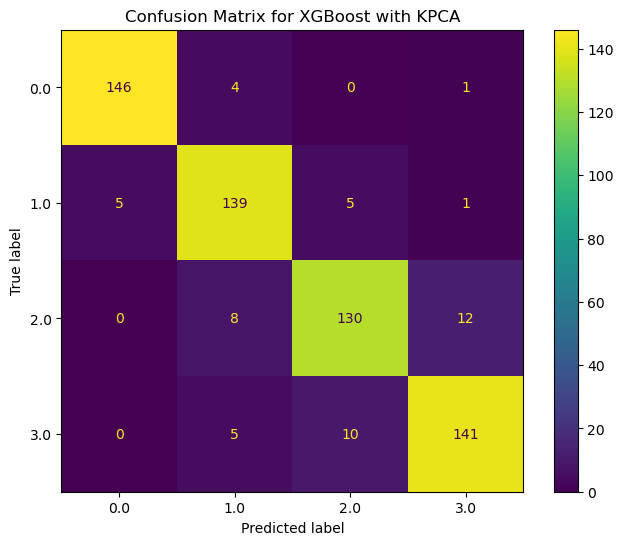

In [163]:
# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_kpca_xgb)

# Visualize confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
disp_xgb.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix for XGBoost with KPCA")
plt.show()

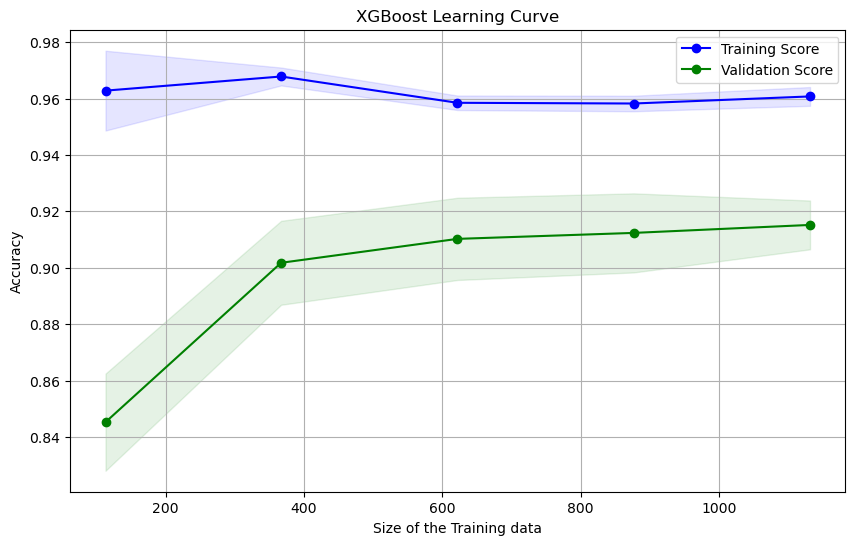

XGBoost Classifier Accuracy: 0.9159802306425041


In [164]:
# Learning curve için verileri elde ediyoruz
train_sizes, train_scores, test_scores = learning_curve(
    xgb_kpca, X_train_kpca, y_train,
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ortalama ve standart sapmaları hesaplayalım
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')

# Standart sapmalar için gölgelendirme
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('XGBoost Learning Curve')
plt.xlabel('Size of the Training data')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# XGBoost doğruluk değeri
print(f"XGBoost Classifier Accuracy: {accuracy_kpca_xgb}")

## SVM Algoritması

In [166]:
# Initialize and train SVM classifier on KPCA data
start_time = time.time()
svm_kpca = SVC(
    kernel='rbf',
    C=2,
    decision_function_shape='ovr',
    random_state=49
)
svm_kpca.fit(X_train_kpca, y_train)
y_pred_kpca_svm = svm_kpca.predict(X_test_kpca)
execution_times['SVM'] = time.time() - start_time

# Evaluate the model
accuracy_kpca_svm = accuracy_score(y_test, y_pred_kpca_svm)
classification_rep_kpca_svm = classification_report(y_test, y_pred_kpca_svm)

# Display the results
print(f"SVM Classifier Accuracy: {accuracy_kpca_svm}")
print("\nClassification Report for SVM:\n")
print(classification_rep_kpca_svm)

SVM Classifier Accuracy: 0.929159802306425

Classification Report for SVM:

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       151
         1.0       0.91      0.91      0.91       150
         2.0       0.93      0.90      0.92       150
         3.0       0.93      0.93      0.93       156

    accuracy                           0.93       607
   macro avg       0.93      0.93      0.93       607
weighted avg       0.93      0.93      0.93       607



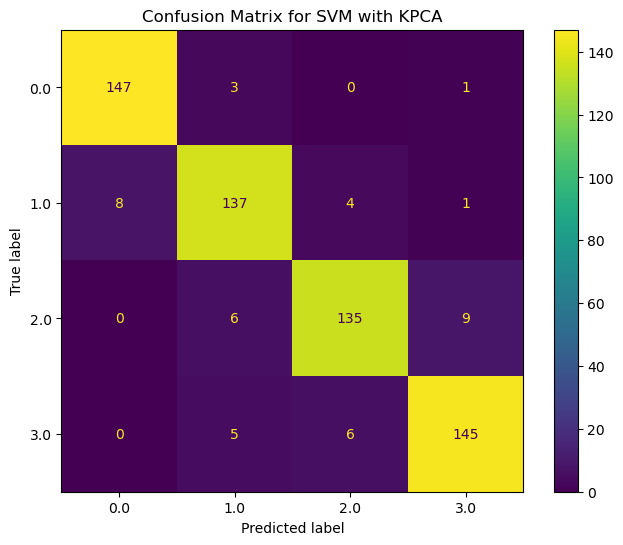

In [167]:
# Calculate confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_kpca_svm)

# Visualize confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
disp_svm.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix for SVM with KPCA")
plt.show()

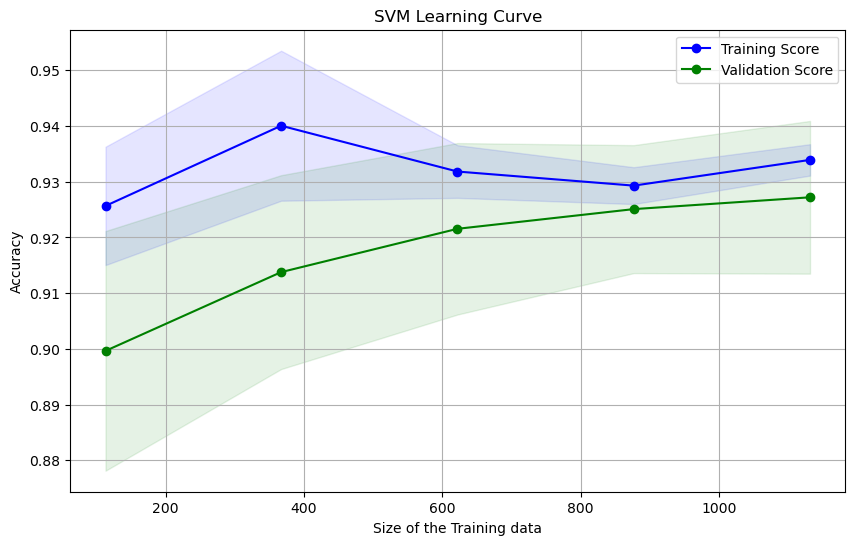

SVM Classifier Accuracy: 0.929159802306425


In [168]:
train_sizes, train_scores, test_scores = learning_curve(
    svm_kpca, X_train_kpca, y_train,
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ortalama ve standart sapmaları hesaplayalım
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')

# Standart sapmalar için gölgelendirme
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('SVM Learning Curve')
plt.xlabel('Size of the Training data')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# SVM doğruluk değeri
print(f"SVM Classifier Accuracy: {accuracy_kpca_svm}")

## Naive Bayes

In [170]:
 # Initialize and train Naive Bayes classifier on KPCA data
start_time = time.time()
nb_kpca = GaussianNB()
nb_kpca.fit(X_train_kpca, y_train)
y_pred_kpca_nb = nb_kpca.predict(X_test_kpca)
execution_times['Naive Bayes'] = time.time() - start_time
# Evaluate the model
accuracy_kpca_nb = accuracy_score(y_test, y_pred_kpca_nb)
classification_rep_kpca_nb = classification_report(y_test, y_pred_kpca_nb)

# Display the results
print(f"Naive Bayes Classifier Accuracy: {accuracy_kpca_nb}")
print("\nClassification Report for Naive Bayes:\n")
print(classification_rep_kpca_nb)

Naive Bayes Classifier Accuracy: 0.8879736408566722

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       151
         1.0       0.80      0.91      0.85       150
         2.0       0.87      0.80      0.83       150
         3.0       0.93      0.89      0.91       156

    accuracy                           0.89       607
   macro avg       0.89      0.89      0.89       607
weighted avg       0.89      0.89      0.89       607



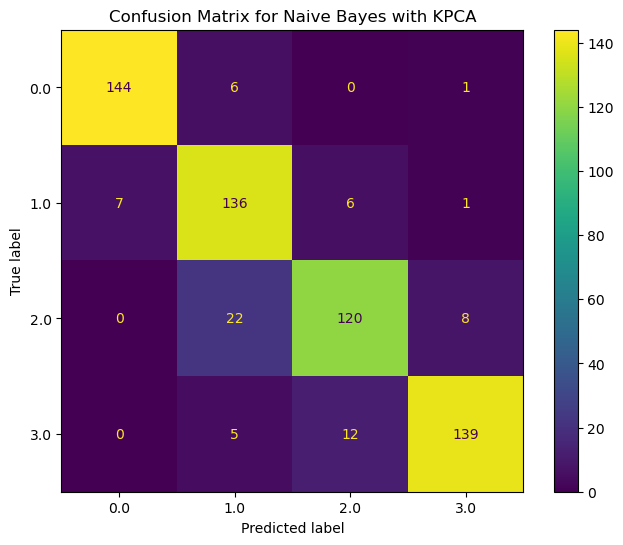

In [171]:
# Calculate confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_kpca_nb)

# Visualize confusion matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=np.unique(y_test))

plt.figure(figsize=(8, 6))
disp_nb.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix for Naive Bayes with KPCA")
plt.show()

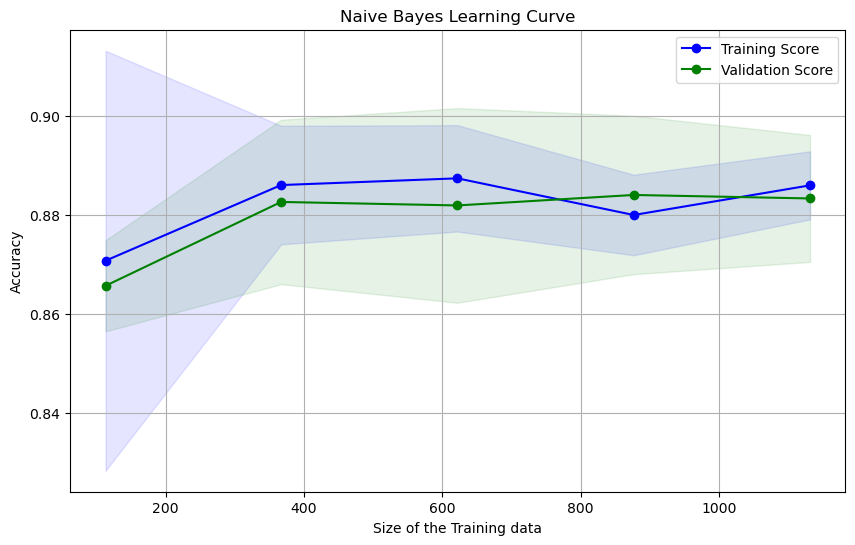

Naive Bayes Classifier Accuracy: 0.8879736408566722


In [172]:
train_sizes, train_scores, test_scores = learning_curve(
    nb_kpca, X_train_kpca, y_train,
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ortalama ve standart sapmaları hesaplayalım
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')

# Standart sapmalar için gölgelendirme
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Naive Bayes Learning Curve')
plt.xlabel('Size of the Training data')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Naive Bayes doğruluk değeri
print(f"Naive Bayes Classifier Accuracy: {accuracy_kpca_nb}")

## Model Performans Karşılaştırması

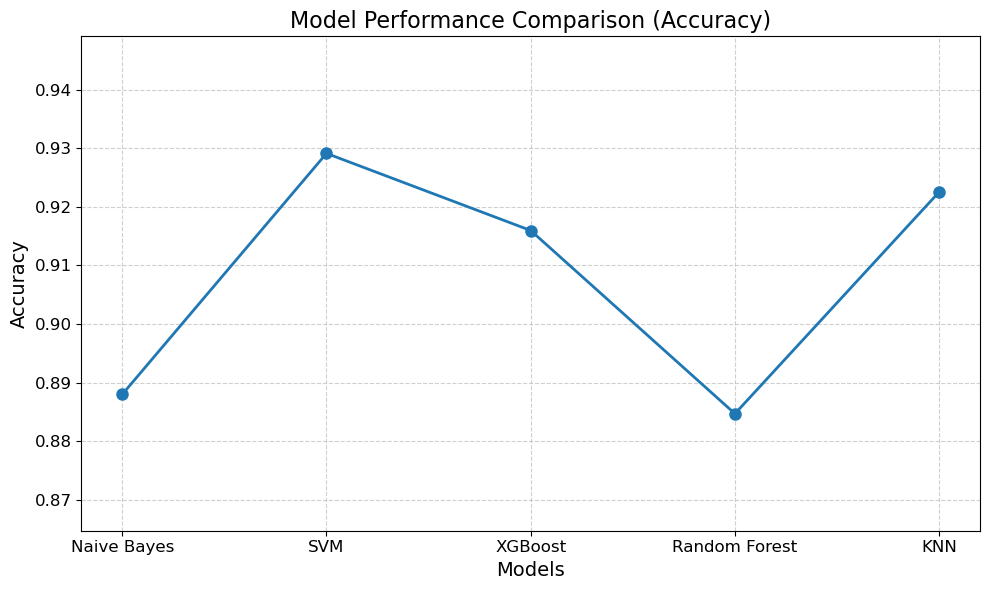

In [174]:
# Model names and corresponding accuracies
model_names = ["Naive Bayes", "SVM", "XGBoost", "Random Forest", "KNN"]
accuracies = [
    accuracy_kpca_nb, 
    accuracy_kpca_svm, 
    accuracy_kpca_xgb, 
    accuracy_kpca_rf, 
    accuracy_kpca
]

# Adjusting scale to focus on accuracy differences
min_accuracy = min(accuracies) - 0.02  # Lower bound slightly below minimum accuracy
max_accuracy = max(accuracies) + 0.02  # Upper bound slightly above maximum accuracy

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.ylim(min_accuracy, max_accuracy)
plt.title("Model Performance Comparison (Accuracy)", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

In [175]:
execution_times_df = pd.DataFrame(list(execution_times.items()), columns=['Algorithm', 'Execution Time (seconds)'])



print("Algorithm Execution Times (Updated):")
print(execution_times_df)

Algorithm Execution Times (Updated):
       Algorithm  Execution Time (seconds)
0            KNN                  0.046254
1  Random Forest                  0.033327
2        XGBoost                  0.041181
3            SVM                  0.053537
4    Naive Bayes                  0.000000


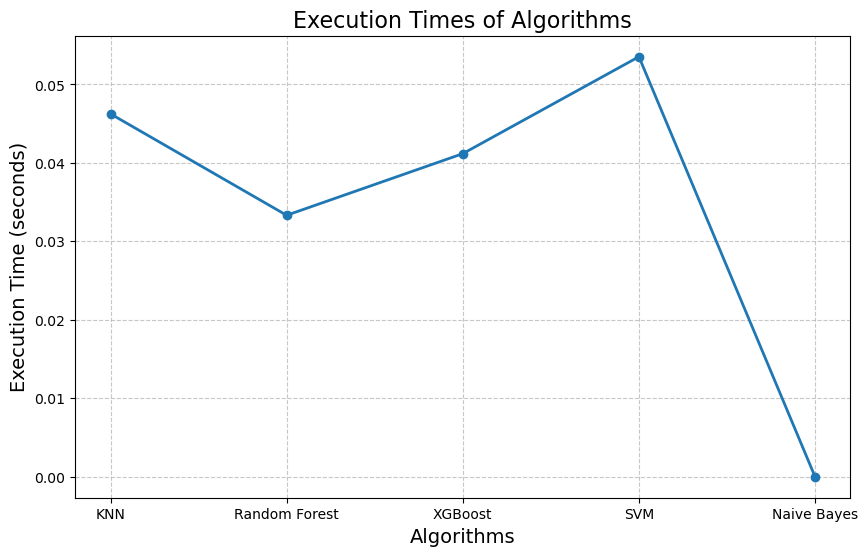

In [176]:
# Plotting execution times as a line chart
plt.figure(figsize=(10, 6))
plt.plot(execution_times_df['Algorithm'], execution_times_df['Execution Time (seconds)'], marker='o', linestyle='-', linewidth=2)

# Adding labels and title
plt.title("Execution Times of Algorithms", fontsize=16)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Execution Time (seconds)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the chart
plt.show()

## DATASETİNE HERHANGİ BİR MANİPÜLASYON YAPMADAN YALNIZCA EKSİK VERİLER DOLDURULARAK İNCELENEN ALGORİTMALARIMIZ


## KNN DİREKT VERİSETİ İLE İNCELEME


KNN Accuracy: 0.8896210873146623
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       154
         1.0       0.89      0.86      0.87       166
         2.0       0.85      0.84      0.84       138
         3.0       0.90      0.91      0.90       149

    accuracy                           0.89       607
   macro avg       0.89      0.89      0.89       607
weighted avg       0.89      0.89      0.89       607



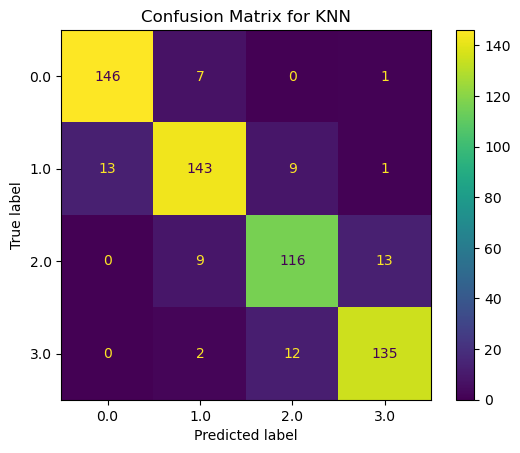

In [179]:
# Özellikler ve hedef değişkeni ayırma
X = data_cleaned.drop(columns=['price_range'])  # 'price_range' hedef değişken
y = data_cleaned['price_range']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN Modeli
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_knn = knn.predict(X_test)

# Performans ölçümleri
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix for KNN")
plt.show()

## RANDOM FOREST DİREKT VERİSETİ İLE İNCELEME

Random Forest Accuracy: 0.8401976935749588
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       154
         1.0       0.86      0.73      0.79       166
         2.0       0.79      0.80      0.80       138
         3.0       0.86      0.90      0.88       149

    accuracy                           0.84       607
   macro avg       0.84      0.84      0.84       607
weighted avg       0.84      0.84      0.84       607



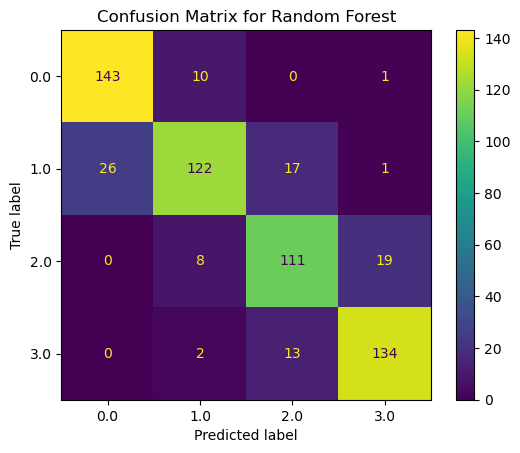

In [181]:
# Random Forest Modeli
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_rf = rf.predict(X_test)

# Performans ölçümleri
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf.classes_)
disp_rf.plot(cmap='viridis')
plt.title("Confusion Matrix for Random Forest")
plt.show()

## XGBOOST DİREKT VERİSETİ İLE İNCELEME


XGBoost Accuracy: 0.8764415156507414
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       154
         1.0       0.90      0.81      0.85       166
         2.0       0.84      0.87      0.85       138
         3.0       0.88      0.91      0.89       149

    accuracy                           0.88       607
   macro avg       0.88      0.88      0.88       607
weighted avg       0.88      0.88      0.88       607



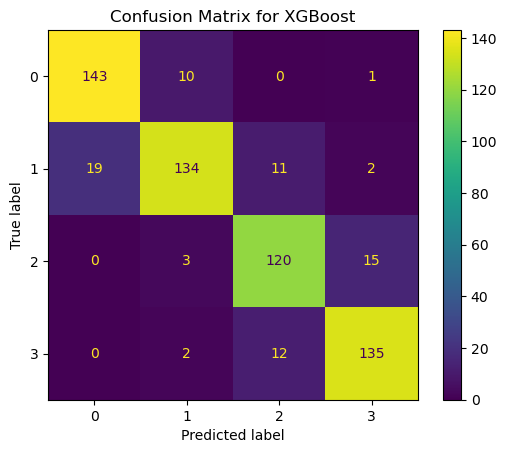

In [183]:
# XGBoost Modeli
xgb_model = XGBClassifier(
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.1, 
    random_state=42, 
    objective='multi:softmax', 
    num_class=len(y.unique())
)
xgb_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_xgb = xgb_model.predict(X_test)

# Performans ölçümleri
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap='viridis')
plt.title("Confusion Matrix for XGBoost")
plt.show()


## SVM DİREKT VERİSETİ İLE İNCELEME

SVM Accuracy: 0.9242174629324547
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       154
         1.0       0.94      0.91      0.92       166
         2.0       0.92      0.88      0.90       138
         3.0       0.91      0.93      0.92       149

    accuracy                           0.92       607
   macro avg       0.92      0.92      0.92       607
weighted avg       0.92      0.92      0.92       607



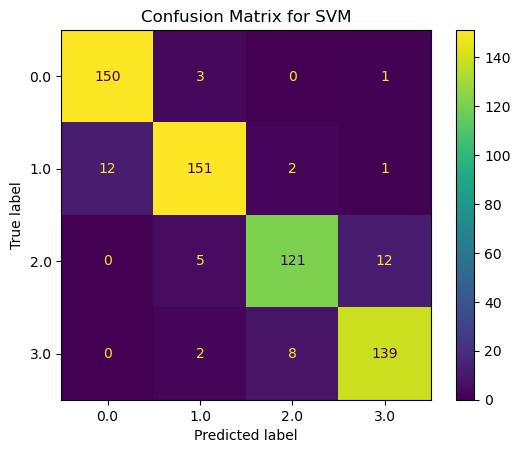

In [185]:
# SVM Modeli
svm = SVC(kernel='rbf', random_state=42)  # RBF (Radial Basis Function) Kernel kullanılıyor
svm.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_svm = svm.predict(X_test)

# Performans ölçümleri
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='viridis')
plt.title("Confusion Matrix for SVM")
plt.show()

# NAİVE BASE DİREKT VERİSETİ İLE İNCELEME


Naive Bayes Accuracy: 0.7957166392092258
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       154
         1.0       0.77      0.69      0.73       166
         2.0       0.71      0.72      0.72       138
         3.0       0.84      0.89      0.86       149

    accuracy                           0.80       607
   macro avg       0.79      0.80      0.79       607
weighted avg       0.79      0.80      0.79       607



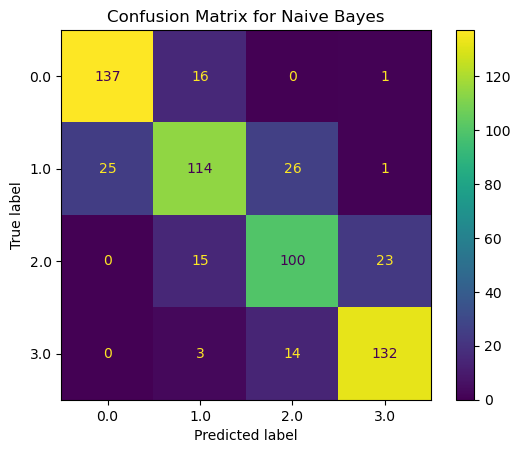

In [187]:
# Naive Bayes Modeli
nb = GaussianNB()
nb.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred_nb = nb.predict(X_test)

# Performans ölçümleri
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=nb.classes_)
disp_nb.plot(cmap='viridis')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


## DİREKT VERİSETLERİ İLE KIYASLAMA SONUÇLARININ TEK GRAFİKTE GÖSTERİMİ

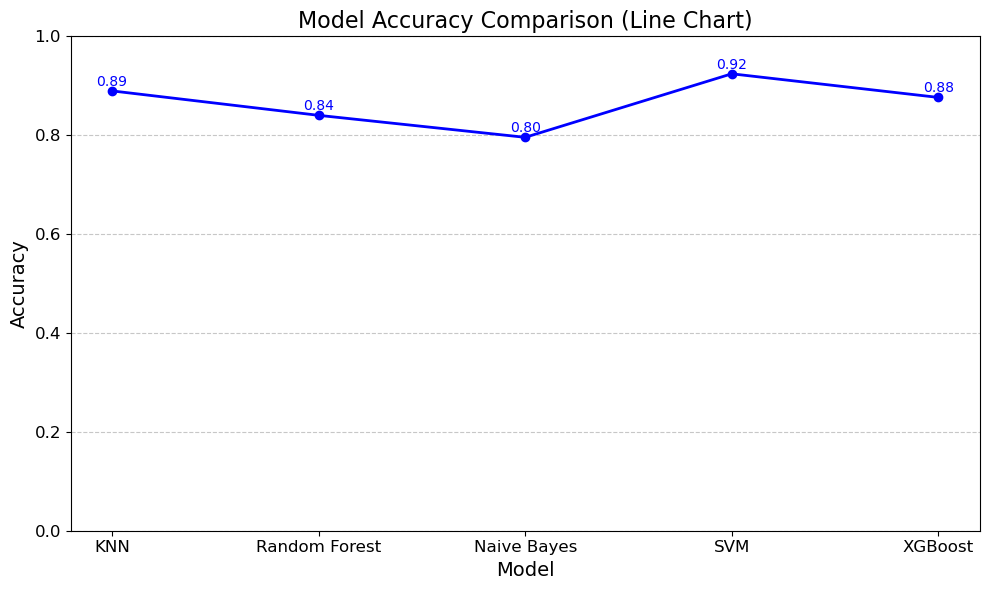

In [189]:
# Tablo oluşturma (aynı veri)
results_df = pd.DataFrame({
    "Model": ["KNN", "Random Forest", "Naive Bayes", "SVM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_xgb)
    ]
})

# Çizgi grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(results_df["Model"], results_df["Accuracy"], marker='o', linestyle='-', linewidth=2, color='blue')

# Grafik detayları
plt.title("Model Accuracy Comparison (Line Chart)", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1)  # Accuracy aralığı 0-1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Noktalar üzerinde değerleri gösterme
for i, value in enumerate(results_df["Accuracy"]):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=10, color='blue')

# Grafik gösterimi
plt.tight_layout()
plt.show()


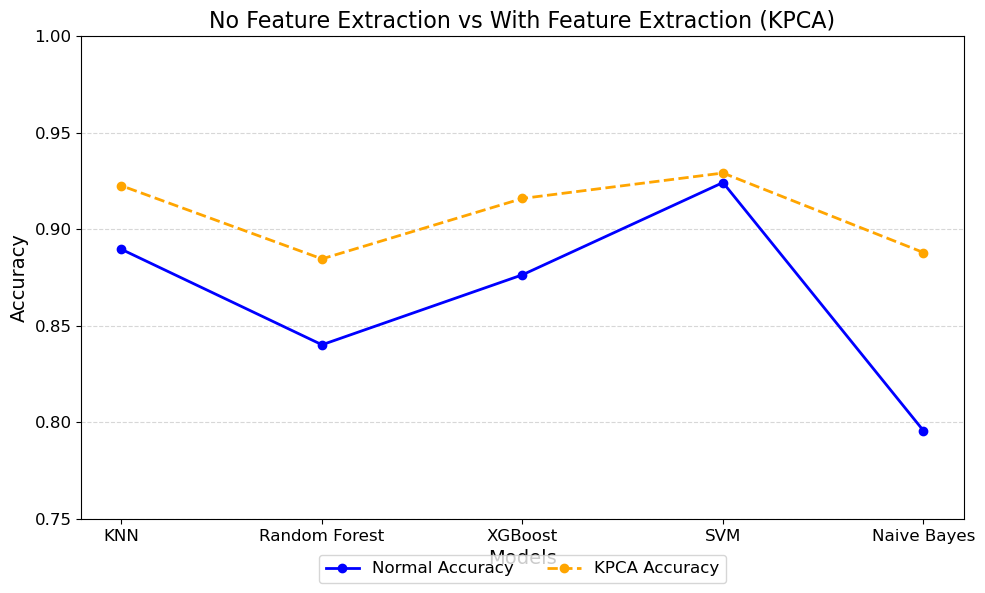

In [190]:
# KPCA sonrası doğruluk değerleri
model_names_kpca = ["Naive Bayes","SVM" , "XGBoost","Random Forest" ,"KNN"]
accuracies_kpca = [
    accuracy_kpca_nb, 
    accuracy_kpca_svm, 
    accuracy_kpca_xgb, 
    accuracy_kpca_rf, 
    accuracy_kpca
]

# Normal doğruluk değerleri
model_names_normal = ["KNN", "Random Forest", "XGBoost","SVM", "Naive Bayes"]
accuracies_normal = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_nb)
]
# Yeni düzenlenmiş çizgi grafiği
plt.figure(figsize=(10, 6))

# Normal doğruluk değerleri (düz çizgi)
plt.plot(model_names_normal, accuracies_normal, marker='o', linestyle='-', linewidth=2, color='blue', label="Normal Accuracy")

# KPCA sonrası doğruluk değerleri (kesik çizgi)
plt.plot(model_names_kpca, accuracies_kpca, marker='o', linestyle='--', linewidth=2, color='orange', label="KPCA Accuracy")


# Grafik başlık ve etiketler
plt.title("No Feature Extraction vs With Feature Extraction (KPCA)", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0.75, 1.0)  # Daha dar bir y ekseni aralığı
plt.grid(axis='y', linestyle='--', alpha=0.5)

# X eksenindeki yazıları yatay hizalama
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend (açıklama) grafiğin alt kısmında
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=12)

# Grafik gösterimi
plt.tight_layout()
plt.show()

